In [1]:
import glove
from dataloader import *
import json
config_data = json.load(open('../config/pretrain_resnet_tagger.json', 'r'))

vocab, indg_vocab, train_data_loader, val_data_loader, test_data_loader = get_datasets(config_data)
for i, (images, title, ing_binary, ing, ins, ann_id) in enumerate(train_data_loader):
    
    
    break
    
emb_layer, num_embeddings, embedding_dim = glove.create_ing_emb_layer(indg_vocab)

Using the saved vocab.
Using the saved ingredient vocab.
found 3147 words


In [2]:
emb_layer

Embedding(3147, 50)

In [3]:
emb_layer.weight

Parameter containing:
tensor([[-0.2537,  0.3300, -0.2471,  ...,  0.2740,  0.4541, -0.1459],
        [-0.1300, -0.0600,  0.2806,  ...,  0.5736,  1.4430,  0.1608],
        [-0.2044, -0.8932,  0.3193,  ..., -0.2951, -1.1185,  0.4880],
        ...,
        [-1.4753, -1.2114, -1.3535,  ...,  0.5277,  1.9914, -4.0461],
        [-0.1948, -1.4226, -1.1237,  ..., -1.7393,  0.5855, -1.5560],
        [-1.0182,  1.7179, -0.9068,  ..., -0.7051,  0.2671,  0.9335]],
       requires_grad=True)

In [4]:
import numpy as np
from sklearn.manifold import TSNE

ingd_embedded = TSNE(n_components=2, 
               init='random').fit_transform(emb_layer.weight.detach().numpy())

In [5]:
ingd_embedded.shape

(3147, 2)

Text(0, 0.5, 't-SNE-2')

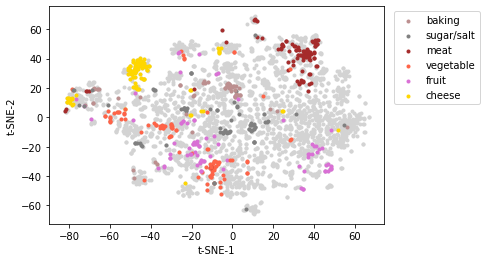

In [6]:
import matplotlib.pyplot as plt

plt.scatter(x = ingd_embedded[:,0], y = ingd_embedded[:,1], color = 'lightgrey', marker = '.')

for name in indg_vocab.word2idx.keys():
    idx = indg_vocab.word2idx[name]
    if 'cheese' in name:
        x,y = ingd_embedded[idx,:]
        #plt.text(x,y,name)
        plt.scatter(x = x, y = y, color = 'gold', marker = '.', label = 'cheese')
    if 'pork' in name or 'beef' in name or 'bacon' in name:
        x,y = ingd_embedded[idx,:]
        #plt.text(x,y,name)
        plt.scatter(x = x, y = y, color = 'brown', marker = '.', label = 'meat')
    if 'tomato' in name or 'onion' in name:
        x,y = ingd_embedded[idx,:]
        #plt.text(x,y,name)
        plt.scatter(x = x, y = y, color = 'tomato', marker = '.', label = 'vegetable')
    if 'grape' in name or 'berry' in name or 'apple' in name:
        x,y = ingd_embedded[idx,:]
        #plt.text(x,y,name)
        plt.scatter(x = x, y = y, color = 'orchid', marker = '.', label = 'fruit')
    if 'sugar' in name or 'salt' in name:
        x,y = ingd_embedded[idx,:]
        #plt.text(x,y,name)
        plt.scatter(x = x, y = y, color = 'grey', marker = '.', label = 'sugar/salt')
    if 'baking' in name or 'flour' in name:
        x,y = ingd_embedded[idx,:]
        #plt.text(x,y,name)
        plt.scatter(x = x, y = y, color = 'rosybrown', marker = '.', label = 'baking')


handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.3,1))

plt.xlabel('t-SNE-1')
plt.ylabel('t-SNE-2')